In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('../creditcard_2023.csv')

In [7]:
df.shape

(568630, 31)

In [8]:
def sample_dataset(df, per_class=2500):   # 1500 → total 3000
    df_small = df.groupby("Class").sample(n=per_class, random_state=42)
    print("Shape =", df_small.shape)
    print(df_small['Class'].value_counts())
    return df_small

# Example: dataset ≈ 3000 rows
df = sample_dataset(df, per_class=2500)

Shape = (5000, 31)
Class
0    2500
1    2500
Name: count, dtype: int64


In [9]:
df.shape

(5000, 31)

In [10]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,138028,1.088324,-0.252963,0.218284,-0.322955,0.377930,-0.210255,0.576307,-0.216568,0.417078,...,-0.172196,-0.426297,-0.165525,-0.332368,0.990322,0.868178,-0.276702,-0.023494,17540.44,0
63099,63099,-0.101252,-0.074360,1.014615,-0.331446,0.342435,0.289295,0.618740,-0.120689,0.084854,...,-0.022928,0.510293,-0.116590,0.063174,-0.478059,-0.919027,-0.657586,-0.373487,504.92,0
73411,73411,0.038280,-0.530361,1.176422,-1.366641,0.029820,0.480989,0.219695,-0.158645,-0.709901,...,-0.157171,0.065838,-0.215458,-0.828908,-0.577586,0.033296,-0.044742,0.477941,8075.44,0
164247,164247,0.174719,-0.109529,0.118822,-0.640229,0.324553,-0.354105,0.736615,-0.121707,0.406979,...,0.036824,0.840588,-0.042448,-0.198675,-0.624764,-0.339986,-0.264655,0.002212,14733.69,0
148999,148999,1.582611,-0.321455,0.612570,0.649210,0.288382,1.001477,0.214045,-0.098299,0.951044,...,-0.061885,0.552161,0.178368,1.495875,-0.414941,-0.034361,-0.260346,-0.203390,9339.27,0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5000.0,284561.482800,164811.071086,88.000000,142783.500000,284397.000000,428965.000000,568629.000000
V1,5000.0,0.006944,0.992828,-2.632435,-0.545396,-0.100088,0.840300,2.133279
V2,5000.0,-0.011453,1.006105,-17.297885,-0.492400,-0.132762,0.333201,4.231178
V3,5000.0,-0.001389,0.978999,-2.513749,-0.637023,-0.001007,0.606065,3.989589
V4,5000.0,-0.009030,0.987850,-4.061119,-0.660891,-0.077559,0.685469,2.366619
V5,5000.0,0.018163,1.073215,-3.292819,-0.283478,0.085338,0.456985,32.538681
V6,5000.0,0.006489,1.020181,-13.044546,-0.448663,0.091421,0.506916,3.423398
V7,5000.0,0.005747,0.903232,-4.188522,-0.273152,0.232800,0.525346,5.380372
V8,5000.0,-0.004169,1.017849,-6.174662,-0.191331,-0.112944,0.044875,5.931479
V9,5000.0,0.018296,0.991628,-3.722288,-0.542902,0.104234,0.573380,6.881752


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 138028 to 480068
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5000 non-null   int64  
 1   V1      5000 non-null   float64
 2   V2      5000 non-null   float64
 3   V3      5000 non-null   float64
 4   V4      5000 non-null   float64
 5   V5      5000 non-null   float64
 6   V6      5000 non-null   float64
 7   V7      5000 non-null   float64
 8   V8      5000 non-null   float64
 9   V9      5000 non-null   float64
 10  V10     5000 non-null   float64
 11  V11     5000 non-null   float64
 12  V12     5000 non-null   float64
 13  V13     5000 non-null   float64
 14  V14     5000 non-null   float64
 15  V15     5000 non-null   float64
 16  V16     5000 non-null   float64
 17  V17     5000 non-null   float64
 18  V18     5000 non-null   float64
 19  V19     5000 non-null   float64
 20  V20     5000 non-null   float64
 21  V21     5000 non-null   float64
 22

In [13]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64



There are no missing value in the dataset, which is great! If there were missings we would have to decide wether to discard the entries or fill the missing values with appropriate techniques.

Now let's check the distribution of our target variable: Class


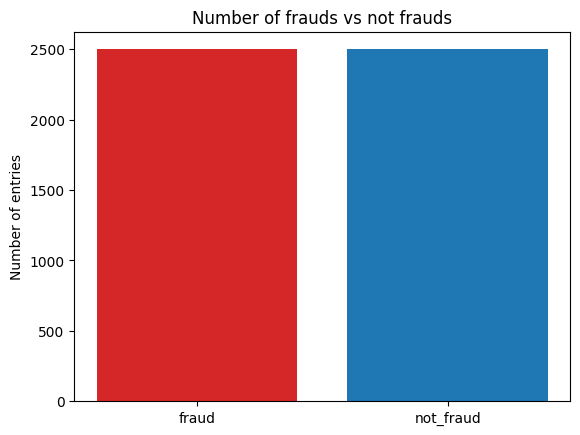

In [14]:

fig, ax = plt.subplots()
x_labels = ['fraud', 'not_fraud']
counts = [df[df['Class']== 1].shape[0], df[df['Class']== 0].shape[0]]
bar_labels = ['fraud', 'not_fraud']
bar_colors = ['tab:red', 'tab:blue']
ax.bar(x_labels, counts, label=bar_labels, color=bar_colors)
ax.set_ylabel('Number of entries')
ax.set_title('Number of frauds vs not frauds')

plt.show()



The dataset has alaready been prepared in a way that the classes are balanced! If the classes were unbalanced, which is the reality for most cases envolving fraud detection, we would have to deal with this problem using techniques for data augmentation or reducing our dataset to balance the classes.

Now let's take a closer look at our variables. Let's drop the ID from our dataset since it does not aggregate any value. Also, we will separate our target variable 'Class'.


In [15]:
X = df.drop(['id','Class'], axis=1)
y = df['Class']

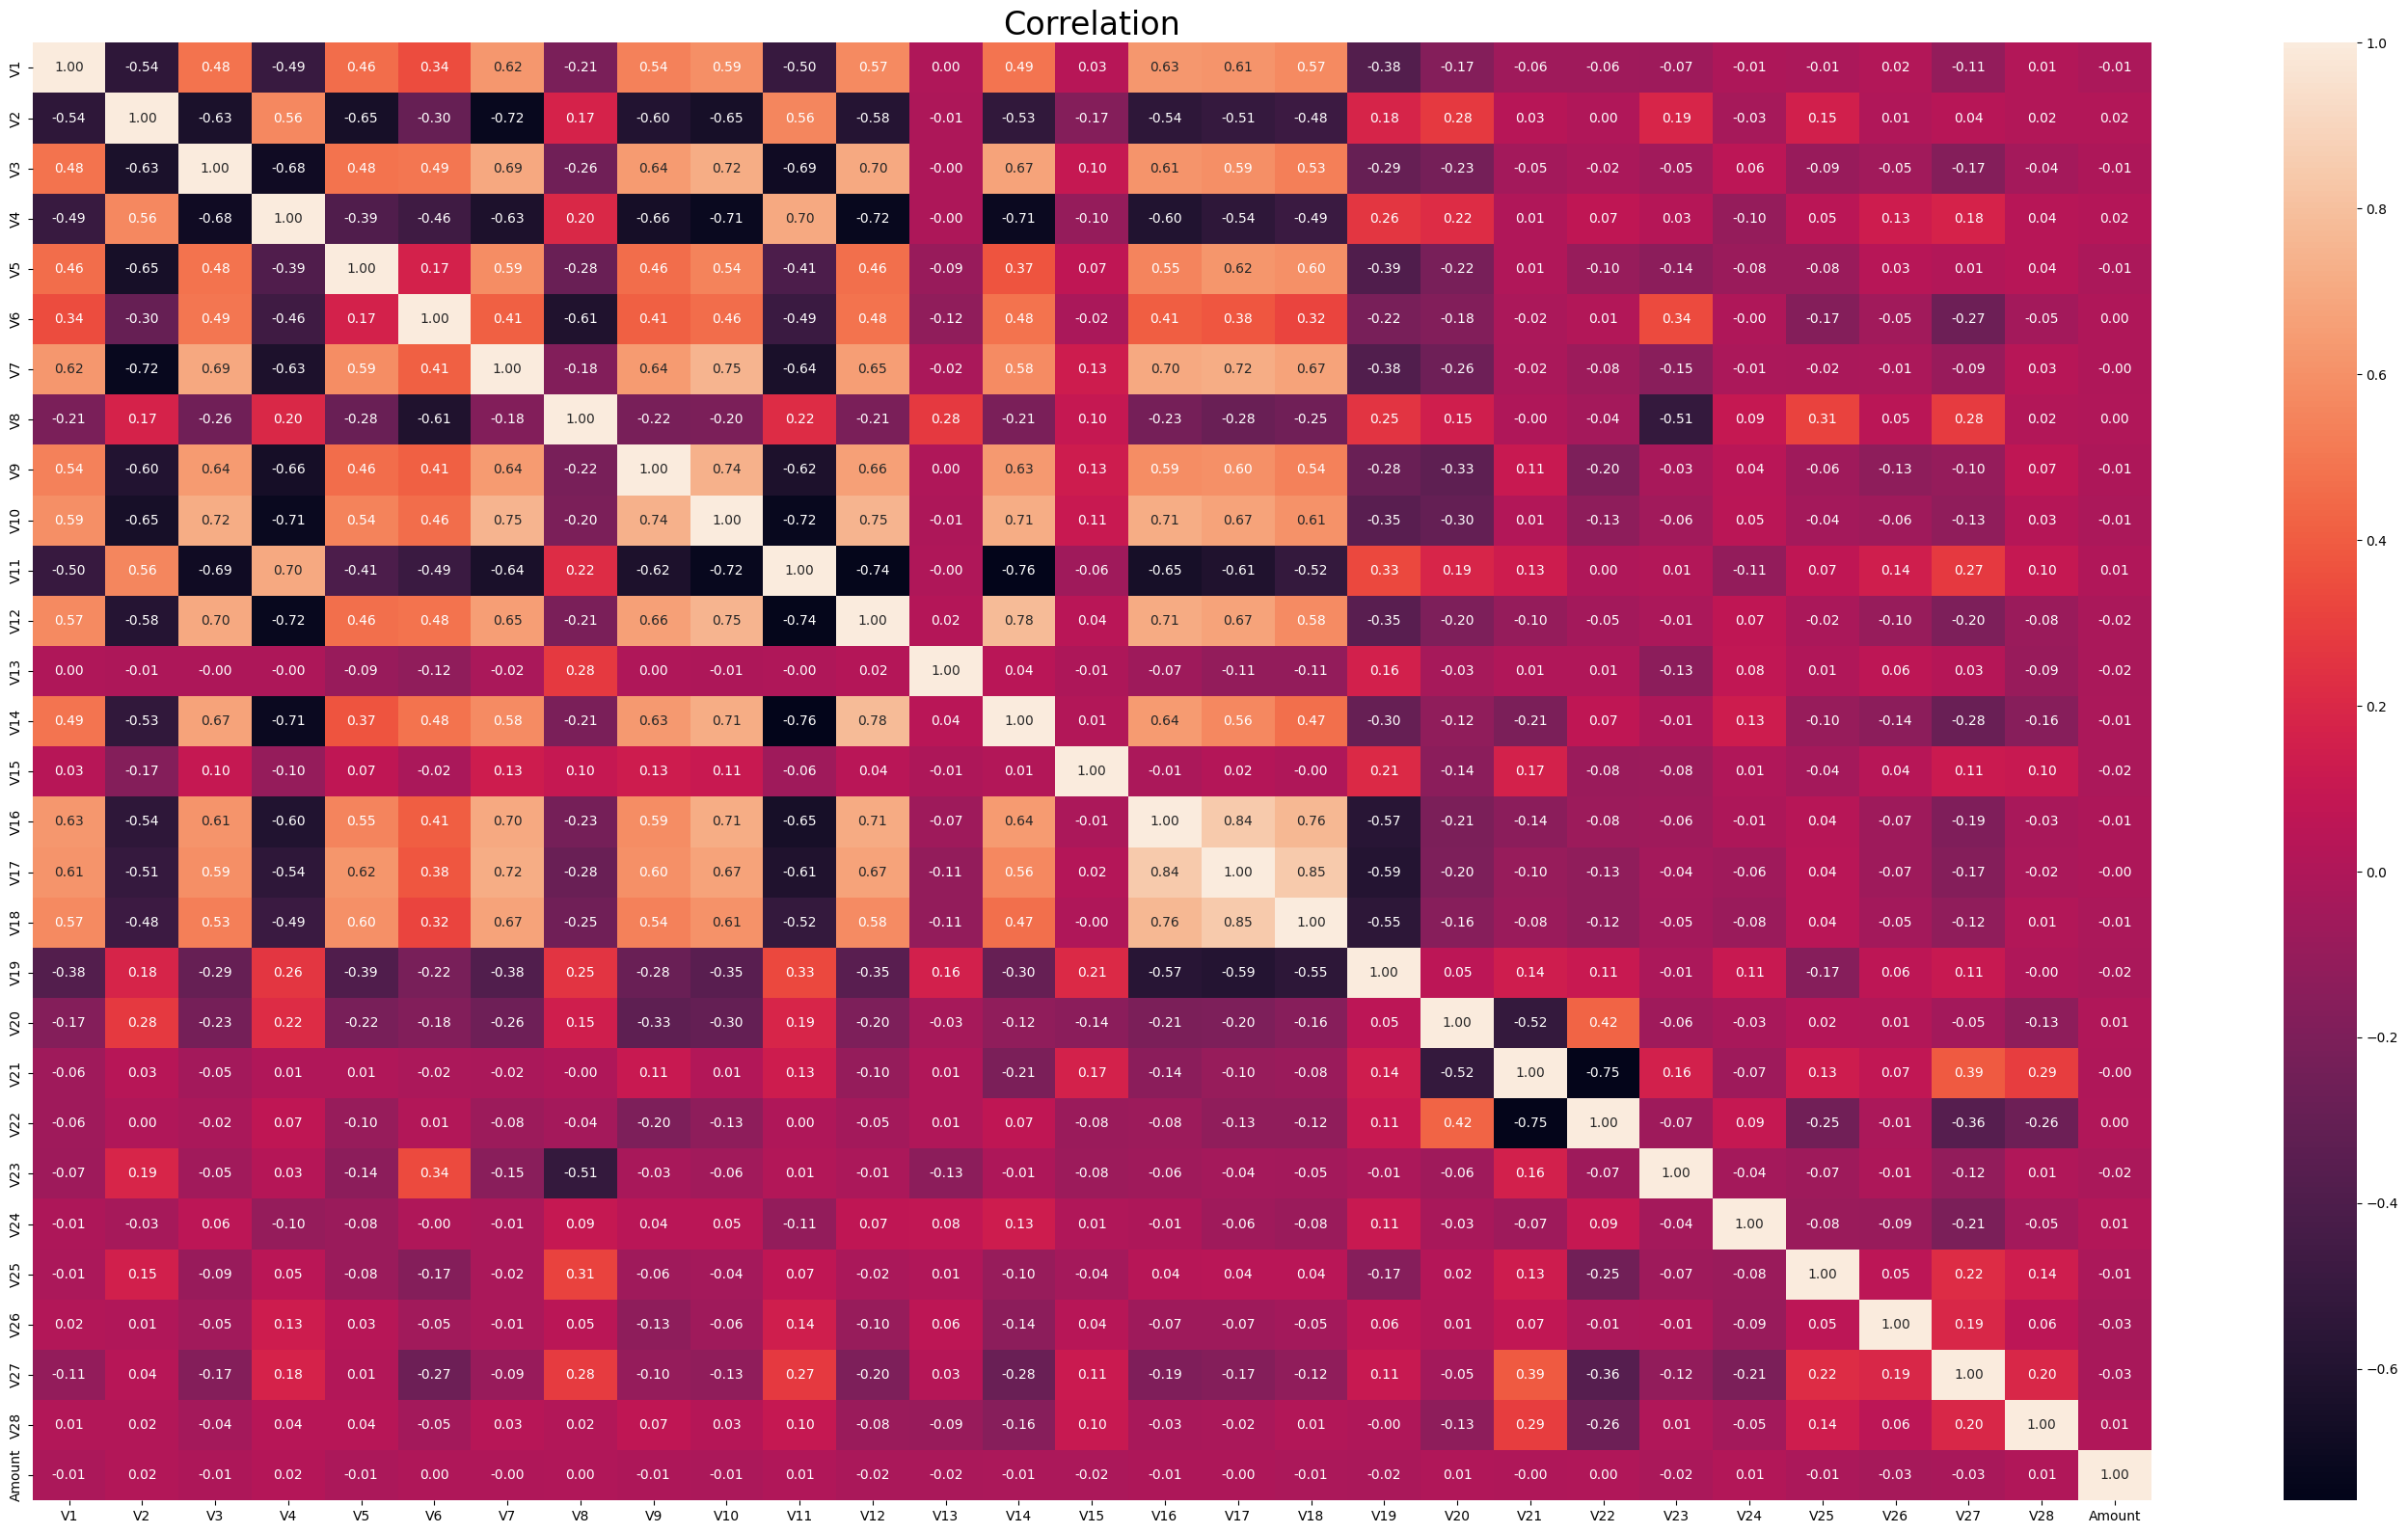

In [16]:
matrix = X.corr()
plt.figure(figsize=(28, 16))
sns.heatmap(matrix, annot=True,  fmt=".2f")
plt.title('Correlation', fontsize=24)
plt.tight_layout()
plt.show()

# **Pre-processing Data**

In [17]:
Q1 = df['Amount'].quantile(0.01)
Q99 = df['Amount'].quantile(0.99)
df = df[(df['Amount'] >= Q1) & (df['Amount'] <= Q99)]


In [18]:
feature_cols = [
    'V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
    'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
    'V21','V22','V23','V24','V25','V26','V27','V28','Amount'
]

X = df[feature_cols]
y = df['Class']


In [19]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [20]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


In [23]:
X_train_sm.shape

(3930, 29)

# **Fitting the Model and Analysing Results**

In [24]:
def evaluate_model(name, model):
    model.fit(X_train_sm, y_train_sm)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)

    print(f"\n==================== {name} ====================")
    print("Accuracy:  ", acc)
    print("Precision: ", prec)
    print("Recall:    ", rec)
    print("F1 Score:  ", f1)
    print("\nConfusion Matrix:\n", cm)

    return [name, acc, prec, rec, f1]



In [25]:
results = []



In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
results.append(evaluate_model("KNN", knn))


==================== KNN ====================
Accuracy:   0.9673469387755103
Precision:  0.9616161616161616
Recall:     0.9734151329243353
F1 Score:   0.967479674796748

Confusion Matrix:
 [[472  19]
 [ 13 476]]


In [27]:
# Naive Bayes
nb = GaussianNB()
results.append(evaluate_model("Naive Bayes", nb))


==================== Naive Bayes ====================
Accuracy:   0.9224489795918367
Precision:  0.9703872437357631
Recall:     0.8711656441717791
F1 Score:   0.9181034482758621

Confusion Matrix:
 [[478  13]
 [ 63 426]]


In [28]:
# SVM with balanced weights
svm = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced')
results.append(evaluate_model("SVM", svm))


==================== SVM ====================
Accuracy:   0.9561224489795919
Precision:  0.9806034482758621
Recall:     0.9304703476482618
F1 Score:   0.9548793284365162

Confusion Matrix:
 [[482   9]
 [ 34 455]]


In [29]:
ann = MLPClassifier(hidden_layer_sizes=(64,32),
                    activation='relu',
                    max_iter=400)
results.append(evaluate_model("ANN", ann))


==================== ANN ====================
Accuracy:   0.9785714285714285
Precision:  0.9795081967213115
Recall:     0.9775051124744376
F1 Score:   0.9785056294779939

Confusion Matrix:
 [[481  10]
 [ 11 478]]


In [30]:
rf=RandomForestClassifier(n_estimators=200, random_state=42)
results.append(evaluate_model(" rf", rf))


====================  rf ====================
Accuracy:   0.9734693877551021
Precision:  0.9915074309978769
Recall:     0.9550102249488752
F1 Score:   0.9729166666666667

Confusion Matrix:
 [[487   4]
 [ 22 467]]


In [31]:
lr= LogisticRegression(max_iter=400, class_weight='balanced')
results.append(evaluate_model("LR", lr))


==================== LR ====================
Accuracy:   0.9591836734693877
Precision:  0.9786780383795309
Recall:     0.9386503067484663
F1 Score:   0.9582463465553236

Confusion Matrix:
 [[481  10]
 [ 30 459]]


In [32]:
xgb=XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
results.append(evaluate_model("XGB", xgb))


==================== XGB ====================
Accuracy:   0.976530612244898
Precision:  0.983402489626556
Recall:     0.9693251533742331
F1 Score:   0.976313079299691

Confusion Matrix:
 [[483   8]
 [ 15 474]]


# **Fitting the Model and Analysing Results With Genetic Algorithm**

In [33]:
import random
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline

In [34]:
# GA Parameters
POP_SIZE = 20
GENERATIONS = 10
MUTATION_RATE = 0.05
CROSSOVER_RATE = 0.8
CV_FOLDS = 3

n_features = X_train_sm.shape[1]

In [35]:
# --- Create Random Individual ---
def create_individual():
    ind = np.random.randint(0,2,size=n_features)
    if ind.sum() == 0:
        ind[np.random.randint(0,n_features)] = 1
    return ind

# --- Mutation ---
def mutate(ind):
    for i in range(len(ind)):
        if random.random() < MUTATION_RATE:
            ind[i] = 1 - ind[i]
    if ind.sum() == 0:
        ind[random.randint(0, n_features-1)] = 1
    return ind

# --- Crossover ---
def crossover(p1, p2):
    if random.random() > CROSSOVER_RATE:
        return p1.copy(), p2.copy()
    point = random.randint(1, n_features-1)
    c1 = np.concatenate((p1[:point], p2[point:]))
    c2 = np.concatenate((p2[:point], p1[point:]))
    return c1, c2

# --- Fitness Function (KNN as evaluator) ---
def fitness(ind):
    mask = ind.astype(bool)
    if mask.sum() == 0:
        return 0

    model = ImbPipeline([
        ("scaler", RobustScaler()),
        ("smote", SMOTE(random_state=42)),
        ("knn", KNeighborsClassifier(n_neighbors=5))
    ])

    X_sub = X_train[:, mask]

    cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_sub, y_train, cv=cv, scoring="f1")
    return scores.mean()
# --- Initial Population ---
population = [create_individual() for _ in range(POP_SIZE)]

# --- Evaluate Population ---
fitness_scores = np.array([fitness(ind) for ind in population])


In [36]:
print("\n\n=========== GA STARTED ===========")

for gen in range(GENERATIONS):
    new_pop = []

    # Elitism
    elite_idx = np.argmax(fitness_scores)
    elite = population[elite_idx].copy()
    new_pop.append(elite)

    # Generate new individuals
    while len(new_pop) < POP_SIZE:
        p1 = population[np.random.randint(0, POP_SIZE)]
        p2 = population[np.random.randint(0, POP_SIZE)]

        c1, c2 = crossover(p1, p2)
        new_pop.append(mutate(c1))
        if len(new_pop) < POP_SIZE:
            new_pop.append(mutate(c2))

    population = new_pop
    fitness_scores = np.array([fitness(ind) for ind in population])

    print(f"Generation {gen+1}/{GENERATIONS} - Best F1: {fitness_scores.max():.4f}")

best_ind = population[np.argmax(fitness_scores)]
selected_mask = best_ind.astype(bool)

print("\nBest Feature Count:", selected_mask.sum())
print("Selected Features:")
print(pd.Series(feature_cols)[selected_mask])



=========== GA STARTED ===========
Generation 1/10 - Best F1: 0.9680
Generation 2/10 - Best F1: 0.9713
Generation 3/10 - Best F1: 0.9721
Generation 4/10 - Best F1: 0.9721
Generation 5/10 - Best F1: 0.9721
Generation 6/10 - Best F1: 0.9721
Generation 7/10 - Best F1: 0.9721
Generation 8/10 - Best F1: 0.9721
Generation 9/10 - Best F1: 0.9721
Generation 10/10 - Best F1: 0.9722

Best Feature Count: 18
Selected Features:
0      V1
1      V2
2      V3
3      V4
5      V6
6      V7
9     V10
10    V11
13    V14
14    V15
15    V16
16    V17
18    V19
20    V21
23    V24
24    V25
25    V26
27    V28
dtype: object


In [37]:
def evaluate_after_ga(name, model):
    model.fit(X_train_sm[:, selected_mask], y_train_sm)
    pred = model.predict(X_test[:, selected_mask])

    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    print(f"\n--- {name} (GA Selected Features) ---")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)

    return [name, acc, prec, rec, f1]

In [38]:
results_ga = []

In [39]:
results_ga.append(evaluate_after_ga("KNN", KNeighborsClassifier(n_neighbors=5)))


--- KNN (GA Selected Features) ---
Accuracy: 0.9714285714285714
Precision: 0.9656565656565657
Recall: 0.9775051124744376
F1 Score: 0.9715447154471545


In [40]:
results_ga.append(evaluate_after_ga("Naive Bayes", GaussianNB()))


--- Naive Bayes (GA Selected Features) ---
Accuracy: 0.9316326530612244
Precision: 0.9709821428571429
Recall: 0.8895705521472392
F1 Score: 0.928495197438634


In [41]:
results_ga.append(evaluate_after_ga("SVM", SVC(kernel='rbf', C=1, gamma='scale')))


--- SVM (GA Selected Features) ---
Accuracy: 0.9612244897959183
Precision: 0.9912854030501089
Recall: 0.9304703476482618
F1 Score: 0.959915611814346


In [42]:
results_ga.append(evaluate_after_ga("ANN", MLPClassifier(hidden_layer_sizes=(64,32), max_iter=400)))


--- ANN (GA Selected Features) ---
Accuracy: 0.9826530612244898
Precision: 0.9796747967479674
Recall: 0.9856850715746421
F1 Score: 0.9826707441386341


In [43]:
results_ga.append(evaluate_after_ga("RF", RandomForestClassifier(n_estimators=200, random_state=42)))


--- RF (GA Selected Features) ---
Accuracy: 0.9724489795918367
Precision: 0.9873417721518988
Recall: 0.9570552147239264
F1 Score: 0.9719626168224299


In [44]:
results_ga.append(evaluate_after_ga("LR", LogisticRegression(max_iter=400, class_weight='balanced')))


--- LR (GA Selected Features) ---
Accuracy: 0.9530612244897959
Precision: 0.978401727861771
Recall: 0.9263803680981595
F1 Score: 0.9516806722689075


In [45]:
results_ga.append(evaluate_after_ga("XGB",XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)))


--- XGB (GA Selected Features) ---
Accuracy: 0.9775510204081632
Precision: 0.9834368530020704
Recall: 0.9713701431492843
F1 Score: 0.977366255144033


In [46]:
comparison_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\n\n========== FINAL COMPARISON TABLE (WITHOUT GA) ==========\n")
print(comparison_df)
comparison_df.to_csv('comparison_without_GA.csv', index=False)

comparison_ga = pd.DataFrame(results_ga, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\n\n===== FINAL COMPARISON TABLE (WITH GA) =====\n")
print(comparison_ga)
comparison_ga.to_csv('comparison_with_GA.csv', index=False)



========== FINAL COMPARISON TABLE (WITHOUT GA) ==========

         Model  Accuracy  Precision    Recall  F1 Score
0          KNN  0.967347   0.961616  0.973415  0.967480
1  Naive Bayes  0.922449   0.970387  0.871166  0.918103
2          SVM  0.956122   0.980603  0.930470  0.954879
3          ANN  0.978571   0.979508  0.977505  0.978506
4           rf  0.973469   0.991507  0.955010  0.972917
5           LR  0.959184   0.978678  0.938650  0.958246
6          XGB  0.976531   0.983402  0.969325  0.976313


===== FINAL COMPARISON TABLE (WITH GA) =====

         Model  Accuracy  Precision    Recall  F1 Score
0          KNN  0.971429   0.965657  0.977505  0.971545
1  Naive Bayes  0.931633   0.970982  0.889571  0.928495
2          SVM  0.961224   0.991285  0.930470  0.959916
3          ANN  0.982653   0.979675  0.985685  0.982671
4           RF  0.972449   0.987342  0.957055  0.971963
5           LR  0.953061   0.978402  0.926380  0.951681
6          XGB  0.977551   0.983437  0.971370  0.97